#Nichtlineare Anpassung



In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pylab as py 
%matplotlib inline 

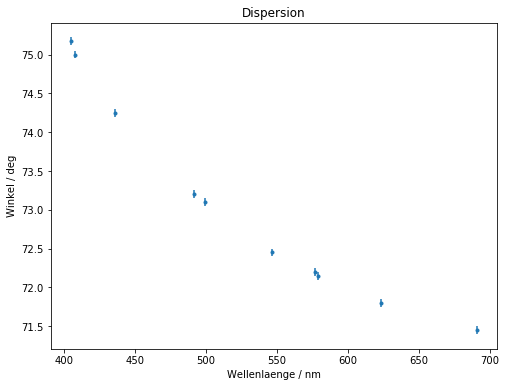

In [6]:
lamb, winkel, err = py.loadtxt('data/dispersion.txt', unpack=True, skiprows=1) #Messwerte importieren
# Versuch Prismenspektrometer
#lamb: Wellenlaenge lambda, winkel: Ablenkwinkek, err: Fehler des Winkels
plt.figure(figsize=(8,6))
plt.errorbar(lamb, winkel, yerr=err, fmt='.') 
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Winkel / deg')
plt.title('Dispersion')

plt.show()

In [7]:
#Fitfunktion360/np.pi*np.arcsin(0.5*(n0+k/(lamb-l))) - 60
def fitFunc(lamb, n0, k, l):
    return 360/np.pi*np.arcsin(0.5*(n0+k/(lamb-l))) - 60

In [8]:
init_vals = [1.8, 8, 200] #Fitparameter initialisieren (n0,k,l)
#Falls der Fit nicht konvergiert muessen die Startparameter geaendert werden
fitParams, fitCovariances = curve_fit(fitFunc, lamb, winkel ,p0=init_vals, sigma=err)
#curve_fit() uebergibt den gefundenen Parametersatz und die Kovarianzmatrix

In [9]:
print(fitParams)
print(fitCovariances) #Fehler der Parameter sind die Wurzeln der Diagonalelemente der Kovarianzmatrix

[  1.80535047   8.49798788 208.58411313]
[[ 1.17440462e-06 -6.73184379e-04  1.04806360e-02]
 [-6.73184379e-04  3.92212265e-01 -6.17984075e+00]
 [ 1.04806360e-02 -6.17984075e+00  9.84951303e+01]]


In [10]:
print("n0=", fitParams[0], ", Standardfehler=", np.sqrt(fitCovariances[0][0]))
print("k=" , fitParams[1], ", Standardfehler=", np.sqrt(fitCovariances[1][1]))
print("l=" , fitParams[2], ", Standardfehler=", np.sqrt(fitCovariances[2][2]))

n0= 1.8053504667485594 , Standardfehler= 0.00108369950445795
k= 8.497987882673774 , Standardfehler= 0.6262685250134785
l= 208.58411313096138 , Standardfehler= 9.924471285747753


Text(0.5, 1.0, 'Dispersion')

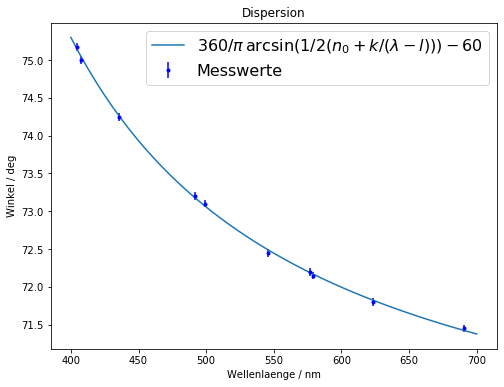

In [11]:
#Diagramm mit angepasster Kurve zeichnen
x=np.linspace(400,700,50) #x-Werte fuer die Fitfunktion 
plt.figure(figsize=(8,6))
plt.plot(x, fitFunc(x, fitParams[0], fitParams[1], fitParams[2]), label=r'$360/\pi\, \arcsin(1/2(n_0+k/(\lambda-l))) - 60$')
plt.errorbar(lamb, winkel, yerr=err, fmt='.', color='b', label=r'Messwerte') 
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Winkel / deg')
plt.legend(loc='best',prop={'size':16})
plt.title('Dispersion')

In [12]:
#Chi_quadrat und Chi_quadrat_reduziert berechnen
chisquare=np.sum((fitFunc(lamb, fitParams[0], fitParams[1], fitParams[2])-winkel)**2/err**2)
dof=len(winkel)-len(init_vals) #dof: degees of freedom, Zahl der Messwerte abzueglich Zahl der Parameter
print("dof=",dof)
print("chisquare=", chisquare, ", chisquare_red=",chisquare/dof)

dof= 7
chisquare= 2.7683305386307997 , chisquare_red= 0.3954757912329714


###Goodness of fit
Berechne die Wahrscheinlichkeit einen chi2 Wert zu bekommen, der groesser oder gleich dem eben berechneten chi2 Wert ist

In [13]:
from scipy.stats import chi2
print("propability="+str(round(100-chi2.cdf(chisquare,dof)*100,2))+"%") #cdf: cumulative distribution function

propability=90.56%


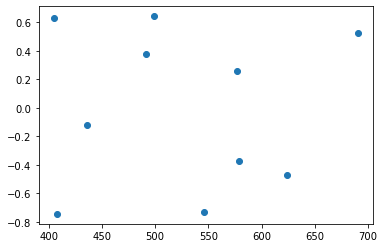

In [14]:
#Residuen in Einheiten des Standardfehlers
residuen=(winkel-fitFunc(lamb, fitParams[0], fitParams[1], fitParams[2]))/err
plt.plot(lamb, residuen, marker='o', linewidth=0)

In [15]:
#plt.hist(residuen) #zu wenig Daten! nicht sehr aussagekraeftig